In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats
import seaborn as sns
from warnings import simplefilter
from sklearn.exceptions import ConvergenceWarning
simplefilter("ignore", category=ConvergenceWarning)
from sklearn import preprocessing

In [5]:
#Read in the data
df = pd.read_csv('cancerDataframe.csv')

#Feature selection
percentile = np.percentile(df.iloc[:,2:], 80, axis=0)
percentile = np.reshape(percentile, (1, len(percentile)))
np_df = df.iloc[:,2:].to_numpy()
np_first2 = df.iloc[:,0:2].to_numpy()

In [6]:
#Split the data
from sklearn.model_selection import train_test_split, cross_val_score

X = df.iloc[:,2:]
y = df.iloc[:,0]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

scaler = preprocessing.MinMaxScaler() #feature scaling
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [7]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score, mean_squared_error

kn = 3

knn = KNeighborsClassifier(n_neighbors=kn)
#knn.fit(X_train, y_train)
scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='f1_macro', error_score="raise")
print('CV score:', scores.mean(), "+/-", scores.std())


#y_pred = knn.predict(test_images)
#final_score = f1_score(y_pred, test_labels, average='macro')
#print(final_score)

CV score: 0.8612661315702482 +/- 0.029114481157259814


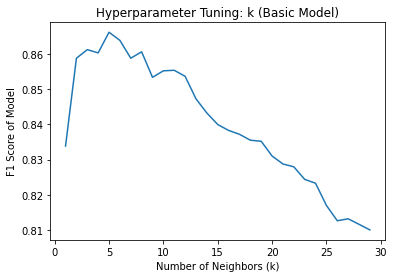

In [6]:
#Tuning
k_lst = []
f1_lst = []

for k in range(1,30):
    k_lst.append(k)
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='f1_macro', error_score="raise")
    f1_lst.append(scores.mean())

plt.plot(k_lst, f1_lst)
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('F1 Score of Model')
plt.title('Hyperparameter Tuning: k (Basic Model)')
plt.show
plt.savefig('tuning_k_basic.pdf', bbox_inches='tight')

In [7]:
from sklearn.linear_model import SGDClassifier

model = SGDClassifier(loss = 'log_loss')
scores = cross_val_score(model, X_train, y_train, cv=10, scoring='f1_macro', error_score="raise")
print('CV score:', scores.mean(), "+/-", scores.std())

CV score: 0.9709591913737846 +/- 0.011423629088512147


In [8]:
from sklearn.svm import LinearSVC

def linear():
    model = LinearSVC()
    scores = cross_val_score(model, X_train, y_train, cv=10, scoring='f1_macro', error_score="raise")
    print('CV score:', scores.mean(), "+/-", scores.std())
    
linear()

#decrease the max number of iterations

CV score: 0.9686602917075302 +/- 0.006962043460314544


<function matplotlib.pyplot.show(close=None, block=None)>

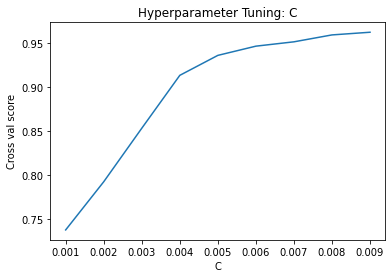

In [10]:
#Tuning SVM
i = 0.001

C_lst = []
score_lst = []

while i <= 0.01:
    C_lst.append(i)
    model = LinearSVC(C = i)
    scores = cross_val_score(model, X_train, y_train, cv=10, scoring='f1_macro', error_score="raise")
    score_lst.append(scores.mean())
    i += 0.001
    
plt.plot(C_lst, score_lst)
plt.xlabel('C')
plt.ylabel('Cross val score')
plt.title('Hyperparameter Tuning: C')
plt.show


In [18]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_predict

model = SVC()
scores = cross_val_score(model, X_train, y_train, cv=10, scoring='f1_macro', error_score="raise")
print('CV score:', scores.mean(), "+/-", scores.std())

CV score: 0.9722414526753393 +/- 0.009023049031284125


<function matplotlib.pyplot.show(close=None, block=None)>

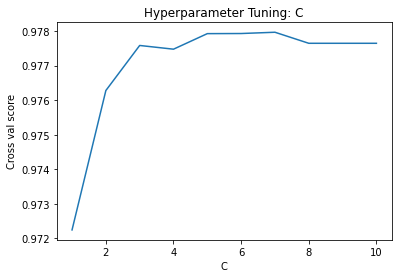

In [20]:
#Tuning SVM
i = 1.0

C_lst = []
score_lst = []

while i <= 10.0:
    C_lst.append(i)
    model = SVC(C = i)
    scores = cross_val_score(model, X_train, y_train, cv=10, scoring='f1_macro', error_score="raise")
    score_lst.append(scores.mean())
    i += 1.0
    
plt.plot(C_lst, score_lst)
plt.xlabel('C')
plt.ylabel('Cross val score')
plt.title('Hyperparameter Tuning: C')
plt.show

#optimal C: 7.0
#grid search kernel width for SVC

In [23]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
scores = cross_val_score(model, X_train, y_train, cv=10, scoring='f1_macro', error_score="raise")
print('CV score:', scores.mean(), "+/-", scores.std())

CV score: 0.9621660240025506 +/- 0.007080853586927267


<function matplotlib.pyplot.show(close=None, block=None)>

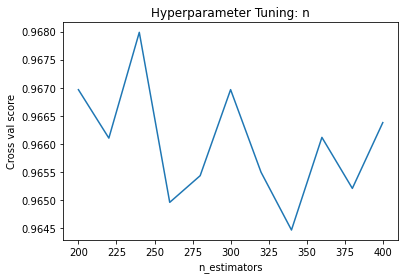

In [25]:
#Tuning Random Forest
i = 200

n_lst = [] #n_estimators 20-200
score_lst = []

while i <= 400:
    n_lst.append(i)
    model = RandomForestClassifier(n_estimators = i)
    scores = cross_val_score(model, X_train, y_train, cv=10, scoring='f1_macro', error_score="raise")
    score_lst.append(scores.mean())
    i += 20

plt.plot(n_lst, score_lst)
plt.xlabel('n_estimators')
plt.ylabel('Cross val score')
plt.title('Hyperparameter Tuning: n')
plt.show

#.968 for n_estimators = 240

In [8]:
from sklearn import tree

model = tree.DecisionTreeClassifier()
scores = cross_val_score(model, X_train, y_train, cv=10, scoring='f1_macro', error_score="raise")
print('CV score:', scores.mean(), "+/-", scores.std())

CV score: 0.851034119626126 +/- 0.024539551453573876


In [8]:
from sklearn.neural_network import MLPClassifier

nnshape = np.array([100, 50])
nn = MLPClassifier(random_state=1, max_iter=300, alpha=0.005, learning_rate_init=0.005)
scores = cross_val_score(nn, X_train, y_train, cv=5, scoring='f1_macro', error_score="raise")
print('CV score:', scores.mean(), "+/-", scores.std())

CV score: 0.968055487854887 +/- 0.0073565993343764225
